# Task 1 - User Overview analysis 


## Task 1.1

In the below code section we initiallize our **panda** and read the **source file** to be interperated.We will also remove data points without customer numbers(`MSISDN/Number`).This is because these kind of datas usually provide insights of little value. 

In [1]:
import os
import pandas as pd
path='C:/Users/chuna/Downloads/challenge/Week2_challenge_data_source.xlsx'
isFile = os.path.isfile(path) 
print(isFile)                           
df = pd.read_excel(path)

df = df[df['MSISDN/Number'].notna()]


True


In this part of the code we will make the data points drawn from the file formatted in way that enables analysis.This includes 
* Combining related data like adding `Upload` and `Download` bytes for each Application.
* Cleaning data of outliers as done  by the function **clean()**(also removing `NaN` values)
* Collecting the cleaned data into  a Dataframe(I have named it **regression** because it will be fitting later).

In [2]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
regre=df[['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
         'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
          'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']]

regre['Social']=regre['Social Media DL (Bytes)'] + regre['Social Media UL (Bytes)']
regre['Google']=regre['Google DL (Bytes)'] + regre['Google UL (Bytes)']
regre['Email']=regre['Email DL (Bytes)'] + regre['Email UL (Bytes)']
regre['Youtube']=regre['Youtube DL (Bytes)'] + regre['Youtube UL (Bytes)']
regre['Netflix']=regre['Netflix DL (Bytes)'] + regre['Netflix UL (Bytes)']
regre['Gaming']=regre['Gaming DL (Bytes)'] + regre['Gaming UL (Bytes)']
regre['Other']=regre['Other DL (Bytes)'] + regre['Other UL (Bytes)']
regre['Total']=regre['Total UL (Bytes)'] + regre['Total DL (Bytes)']
temp =df[['MSISDN/Number']]
task_2_1  = pd.concat([df[['MSISDN/Number']], regre['Social'],regre['Google'],regre['Email'],regre['Youtube'],
                       regre['Netflix'],regre['Gaming'],regre['Other'],regre['Total']], axis=1)

def clean(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    y1.reset_index(drop=True, inplace=True)
   
    return y1



social=clean(regre['Social'])
Google=clean(regre['Google'])
Email=clean(regre['Email'])
Youtube=clean(regre['Youtube'])
Netflix=clean(regre['Netflix'])
Gaming=clean(regre['Gaming'])
Other=clean(regre['Other'])
Total=clean(regre['Total'])




regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other,Total],axis=1)

regression


,Social,Google,Youtube,Netflix,Gaming,Other,Total
0,1570185.0,4414096.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1933278.0,10229119.0,23944031.0,23751202.0,609920783.0,541959383.0,307690973.0
2,1726277.0,7748843.0,22911539.0,15092588.0,229980251.0,414908351.0,607681403.0
3,657493.0,4906872.0,21981135.0,17539799.0,531237049.0,564619822.0,651527183.0
4,912788.0,3872713.0,19623308.0,13881809.0,574923841.0,545316477.0,568809782.0
...,...,...,...,...,...,...,...
89355,892867.0,7283344.0,24553645.0,18411806.0,571286842.0,412079886.0,666947481.0
89356,993175.0,8922614.0,27955095.0,13742615.0,535806880.0,633549896.0,631804110.0
89357,2352181.0,4415361.0,22165518.0,28354119.0,631628095.0,263493166.0,705783925.0
89358,1260239.0,6585469.0,24516413.0,15029702.0,566933800.0,179348636.0,627698629.0


## Task 1.1

Here we are going to group the original dataframe by user and find the following:
* Count the number of **`xDR sessions`**.
* Sum each user **`xDR sessions`**. duration.
* Find the total **`Upload and Download`** volume.
* The **`total data volume`** due to Applications. 

In [3]:
task_1_1 = df.groupby('MSISDN/Number').agg(Total_xDR=('Dur. (ms)', 'sum'), 
 number_of_xDR_sessions=('Bearer Id', 'count'),Total_DL=('Total DL (Bytes)', 'sum'),Total_UL=('Total UL (Bytes)', 'sum')) 
task_1_1['total_data_volume_(in Bytes)'] = task_1_1['Total_DL'] + task_1_1['Total_UL'] 
task_1_1



,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes)
MSISDN/Number,,,,,
3.360100e+10,116720.0,1,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,181230.0,1,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,134969.0,1,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,49878.0,1,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,37104.0,2,1.363130e+09,94280527.0,1.457411e+09
...,...,...,...,...,...
3.379000e+10,8810.0,1,6.879252e+08,26716429.0,7.146416e+08
3.379000e+10,140988.0,1,4.445751e+08,35732243.0,4.803073e+08
3.197021e+12,877385.0,1,1.948281e+08,37295915.0,2.321240e+08


## Task 1.2

This is where we will do simple **Non-Graphical Univariate Analysis** where we figure out which **`Handset`** is being used widly and
also which **`Handset Manufacturer`** is best chosen by users.Also the top 5 handsets per **`Handset Manufacturer`** is also captured.

In [4]:
handsets=df['Handset Type']
handsets=handsets[handsets!='undefined']


handsets.value_counts().nlargest(10)


handsetmanufacturer=df['Handset Manufacturer']
handsetmanufacturer=handsetmanufacturer[handsetmanufacturer!='undefined']
handsetmanufacturer.value_counts().nlargest(10)


           

Apple                                   59464
Samsung                                 40579
Huawei                                  34366
Sony Mobile Communications Ab             978
Wiko Global Sasu                          746
Xiaomi Communications Co Ltd              395
Oneplus Technology (Shenzhen) Co Ltd      340
Asustek                                   285
Lenovo                                    254
Tcl Communication Ltd                     219
Name: Handset Manufacturer, dtype: int64

In [5]:
handsets.value_counts().nlargest(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: Handset Type, dtype: int64

In [6]:
by_manufacturer = df.groupby(['Handset Manufacturer'])

by_manufacturer.get_group('Apple')['Handset Type'].value_counts().nlargest(5) 

Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64

In [7]:
by_manufacturer.get_group('Samsung')['Handset Type'].value_counts().nlargest(5)

Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64

**`Graphical Univariate Analysis`** for the duration of a single session can be shown by plotting the data on **distplot()**.
* Rough estimation of the mean can be done from the figure.
* The data will be  cleaned prior to drwaing.This is done through utilizing the lowest quantile and the highest quantile.

This will help us visualize the what is the most frequent session duration.

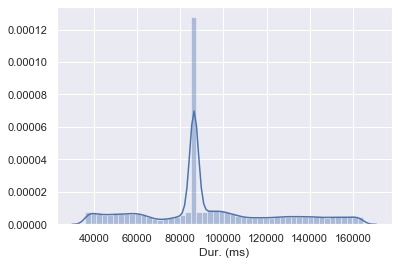

In [8]:
duration=df['Dur. (ms)']

x= duration

x = x[x.between(x.quantile(.15), x.quantile(.85))] 



g= sns.distplot(x)




**Bivariate Analysis** The relationship between each application & the total DL+UL data can be visualized here.I have used Stacked plots for this multivariate visuallization.

The longer the bar for a certain color the pronounced its effect on the `Total`.

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Values'),
 Text(0.5, 1.0, 'Bar plot of Applications')]

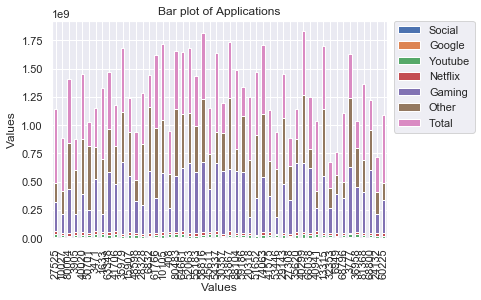

In [9]:

lp=regression.sample(50).plot.bar(stacked=True)
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Bar plot of Applications', xlabel='Values', ylabel='Values')

The **top five decile classes** can be observed here.Duplicates have been droped to enable computation.After grouping by their **`xDR duration`**  there (DL+UL) is summed per decile.

In [10]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_data=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

,Total_data
Decile_rank,
0,5.439277e+12
1,6.109410e+12
2,6.536402e+12
3,6.034241e+12
4,5.143732e+12


**Correlation Analysis** for the cleaned data points is computed here.Also it is here shown that some variables are more related than other.

           Social    Google   Youtube   Netflix    Gaming     Other
Social   1.000000  0.000749  0.001472 -0.000958  0.001406  0.003856
Google   0.000749  1.000000  0.002619 -0.001171  0.005089 -0.001475
Youtube  0.001472  0.002619  1.000000 -0.001524  0.007751  0.004219
Netflix -0.000958 -0.001171 -0.001524  1.000000  0.001267 -0.001195
Gaming   0.001406  0.005089  0.007751  0.001267  1.000000 -0.000119
Other    0.003856 -0.001475  0.004219 -0.001195 -0.000119  1.000000


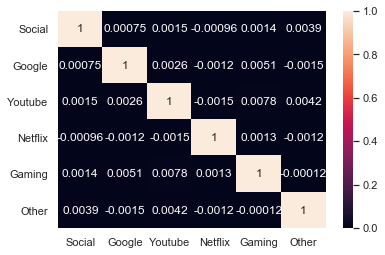

In [11]:
del regression['Total']
corrMatrix = regression.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)




## Task 2.1

In [61]:
task_1_1
#reminder

,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes),Decile_rank,Cluster
MSISDN/Number,,,,,,,
3.362632e+10,8791927.0,18,7.301517e+09,669650721.0,7.971167e+09,9,2
3.362578e+10,18553754.0,17,7.770043e+09,729577380.0,8.499621e+09,9,2
3.361489e+10,9966898.0,17,8.156743e+09,689483001.0,8.846226e+09,9,2
3.365973e+10,4035428.0,16,7.081602e+09,624260321.0,7.705863e+09,9,2
3.367588e+10,4865947.0,15,7.309542e+09,581568792.0,7.891111e+09,9,2
...,...,...,...,...,...,...,...
3.366431e+10,115174.0,1,7.697377e+07,47866737.0,1.248405e+08,5,0
3.366070e+10,86400.0,1,7.017732e+07,54659268.0,1.248366e+08,3,0
3.366805e+10,101395.0,1,7.527304e+07,49547614.0,1.248206e+08,4,0


In [59]:
task_1_1_by_frequency=task_1_1.sort_values(by=['number_of_xDR_sessions'], inplace=True,ascending=False)
print(task_1_1['number_of_xDR_sessions'].head(5))

MSISDN/Number
3.362632e+10    18
3.362578e+10    17
3.361489e+10    17
3.365973e+10    16
3.367588e+10    15
Name: number_of_xDR_sessions, dtype: int64


In [14]:
task_1_1_by_frequency=task_1_1.sort_values(by=['Total_xDR'], inplace=True,ascending=False)
print(task_1_1['Total_xDR'].head())

MSISDN/Number
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
Name: Total_xDR, dtype: float64


In [15]:
task_1_1_by_frequency=task_1_1.sort_values(by=['total_data_volume_(in Bytes)'], inplace=True,ascending=False)
print(task_1_1['total_data_volume_(in Bytes)'].head())

MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
Name: total_data_volume_(in Bytes), dtype: float64


**Normalization** - We will Normalize the User Engagement metrics using **mean and standard deviation**.

In [16]:

normalized_task_1_1=(task_1_1-task_1_1.mean())/task_1_1.std()
normalized_task_1_1 = normalized_task_1_1[['Total_xDR','number_of_xDR_sessions','total_data_volume_(in Bytes)']]
normalized_task_1_1.head(5)

,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes)
MSISDN/Number,,,
3.361489e+10,52.698009,19.362013,16.607609
3.376054e+10,49.009079,16.880691,15.932630
3.362578e+10,98.775050,19.362013,15.901772
3.362632e+10,46.393118,20.602674,14.825614
3.367588e+10,25.326323,16.880691,14.662585


Run a k-means (**k=3**) to classify customers in three groups of engagement.

In [17]:
import collections, numpy
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(normalized_task_1_1)
centroids = kmeans.cluster_centers_
print(centroids)

result = kmeans.labels_ 
normalized_task_1_1['newcol'] = result

normalized_task_1_1['newcol']
task_1_1['Cluster'] = normalized_task_1_1['newcol']
task_1_1


[[-0.2308969  -0.45369906 -0.3991656 ]
 [ 0.37089214  0.97911629  0.86644193]
 [ 2.74882525  3.74397235  3.26076924]]


,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes),Decile_rank,Cluster
MSISDN/Number,,,,,,,
3.361489e+10,9966898.0,17,8.156743e+09,689483001.0,8.846226e+09,9,2
3.376054e+10,9279434.0,15,7.811295e+09,703478581.0,8.514774e+09,9,2
3.362578e+10,18553754.0,17,7.770043e+09,729577380.0,8.499621e+09,9,2
3.362632e+10,8791927.0,18,7.301517e+09,669650721.0,7.971167e+09,9,2
3.367588e+10,4865947.0,15,7.309542e+09,581568792.0,7.891111e+09,9,2
...,...,...,...,...,...,...,...
3.367548e+10,38371.0,1,1.451865e+07,23503704.0,3.802236e+07,1,0
3.378251e+10,102689.0,1,1.130533e+07,26623910.0,3.792924e+07,4,0
3.366668e+10,190320.0,1,9.455608e+06,24544016.0,3.399962e+07,7,0


In [18]:





cluster_Total_xDR = task_1_1.groupby('Cluster').agg(Total_Total_xDR=('Total_xDR', 'sum'),
                                    min_Total_xDR=('Total_xDR', 'min'),
                                     max_Total_xDR=('Total_xDR', 'max'),
                                     avg_Total_xDR=('Total_xDR', 'mean')) 
cluster_Total_xDR


,Total_Total_xDR,min_Total_xDR,max_Total_xDR,avg_Total_xDR
Cluster,,,,
0,8.234215e+09,7142.0,1035261.0,103121.041127
1,5.049336e+09,18235.0,1480875.0,215250.074644
2,2.335286e+09,66594.0,18553754.0,658197.934329


In [63]:
cluster_number_of_xDR_sessions = task_1_1.groupby('Cluster').agg(Total_number_of_xDR_sessions=('number_of_xDR_sessions', 'sum'),
                                    min_number_of_xDR_sessions=('number_of_xDR_sessions', 'min'),
                                     max_number_of_xDR_sessions=('number_of_xDR_sessions', 'max'),
                                     avg_number_of_xDR_sessions=('number_of_xDR_sessions', 'mean')) 
cluster_number_of_xDR_sessions

,Total_number_of_xDR_sessions,min_number_of_xDR_sessions,max_number_of_xDR_sessions,avg_number_of_xDR_sessions
Cluster,,,,
0,82088,1,2,1.028028
1,51202,1,4,2.182710
2,15645,1,18,4.409526


In [64]:
cluster_Total_xDR = task_1_1.groupby('Cluster').agg(total_data_volume=('total_data_volume_(in Bytes)', 'sum'),
                                    min_total_data_volume=('total_data_volume_(in Bytes)', 'min'),
                                     max_total_data_volume=('total_data_volume_(in Bytes)', 'max'),
                                     avg_total_data_volume=('total_data_volume_(in Bytes)', 'mean')) 
cluster_Total_xDR

,total_data_volume,min_total_data_volume,max_total_data_volume,avg_total_data_volume
Cluster,,,,
0,3.952191e+13,33249009.0,9.507607e+08,4.949519e+08
1,2.618146e+13,177006936.0,2.512802e+09,1.116100e+09
2,8.130074e+12,370420998.0,8.846226e+09,2.291453e+09


Aggregate user total traffic per application and derive the top 10 most engaged users per application. Here we will aggrgate Users total traffic for each application.Then we can sort which users are using the applications the most.

In [20]:
App_peruser=task_2_1.groupby('MSISDN/Number').agg(Social=('Social', 'sum'),Google=('Google', 'sum'),Email=('Email', 'sum'), Youtube=('Youtube', 'sum'),Netflix=('Netflix', 'sum'),Gaming=('Gaming', 'sum'),Other=('Other', 'sum'))
App_peruser

,Social,Google,Email,Youtube,Netflix,Gaming,Other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0


In [21]:
App_peruser.sort_values(by=['Social'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Social']].head(10))

   MSISDN/Number     Social
0   3.366496e+10  1570185.0
1   3.368185e+10  1933278.0
2   3.376063e+10  1726277.0
3   3.375034e+10   657493.0
4   3.369980e+10   912788.0
5   3.366819e+10  3200014.0
6   3.366537e+10  1624991.0
7   3.376349e+10  3161403.0
8   3.369874e+10   372625.0
9   3.365922e+10  1585413.0


In [22]:
App_peruser.sort_values(by=['Google'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Google']].head(10))

   MSISDN/Number      Google
0   3.366496e+10   2905912.0
1   3.368185e+10   4414096.0
2   3.376063e+10  10229119.0
3   3.375034e+10  11811761.0
4   3.369980e+10   7748843.0
5   3.366819e+10  12934133.0
6   3.366537e+10   4906872.0
7   3.376349e+10   3872713.0
8   3.369874e+10   8902099.0
9   3.365922e+10   8778341.0


In [66]:
App_peruser.sort_values(by=['Youtube'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Youtube']].head(10))

   MSISDN/Number     Youtube
0   3.366496e+10  18355943.0
1   3.368185e+10  39359124.0
2   3.376063e+10  34425237.0
3   3.375034e+10  36534765.0
4   3.369980e+10  34222253.0
5   3.366819e+10  23944031.0
6   3.366537e+10   9120760.0
7   3.376349e+10  31924969.0
8   3.369874e+10  29297508.0
9   3.365922e+10  22911539.0


We can sum up each **users** application traffic to get the top used **Application**.

In [24]:


sum_column = App_peruser.sum(axis=0)

sum_column.sort_values( inplace=True,ascending=False)
print(sum_column)

Gaming     6.408892e+13
Other      6.395425e+13
Youtube    3.372204e+12
Netflix    3.370060e+12
Google     1.162853e+12
Email      3.364677e+11
Social     2.722655e+11
dtype: float64


Now once we have the top used applications we can plot them as a **line plot** and see how much one overtakes the other.

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Custome ID'),
 Text(0.5, 1.0, 'Line plot Applications')]

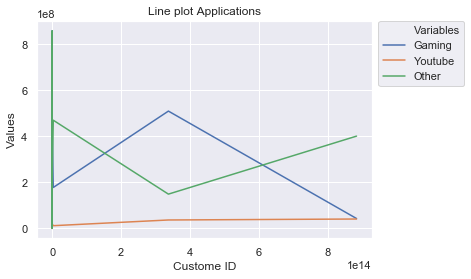

In [65]:
task_2_1_plot = task_2_1.drop_duplicates('MSISDN/Number')
series = pd.melt(task_2_1_plot[['MSISDN/Number','Gaming','Youtube','Other']], id_vars=['MSISDN/Number'],
                var_name='Variables',
                value_name='values')

series.head(10)

lp = sns.lineplot(x='MSISDN/Number', y='values', hue='Variables', data=series)
#Position the legend out the graph
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Line plot Applications', xlabel='Custome ID', ylabel='Values')

In [26]:
###################comeback

## Task 3 - Experience Analytics

### Task 3.1



Aggregate, per customer Experience metrics.Firt off course data points will be treated for outliers and blank values.

Also **`handsets`** which are unkown are ignored.

We will define a new cleaning function (**cleanx**) because here we will be index sensitive.

In [27]:
task_3_1=df[['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)',
             'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Handset Type']]

def cleanx(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    
   
    return y1


Other=cleanx(task_3_1['TCP DL Retrans. Vol (Bytes)'])

social=cleanx(task_3_1['Avg Bearer TP UL (kbps)'])
Google=cleanx(task_3_1['Avg Bearer TP DL (kbps)'])
Youtube=cleanx(task_3_1['Avg RTT DL (ms)'])
Netflix=cleanx(task_3_1['Avg RTT UL (ms)'])
Gaming=cleanx(task_3_1['TCP UL Retrans. Vol (Bytes)'])



regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other],axis=1)

regression['Avg Bearer TP UL (kbps)'].head(120000)


k=pd.merge( task_3_1['MSISDN/Number'],social, left_index=True, right_index=True)
k=pd.merge(k, Google, left_index=True, right_index=True)
k=pd.merge(k, Youtube, left_index=True, right_index=True)
k=pd.merge(k, Netflix, left_index=True, right_index=True)
k=pd.merge(k, Gaming, left_index=True, right_index=True)
k=pd.merge(k, Other, left_index=True, right_index=True)



k['Total_TP'] = k['Avg Bearer TP UL (kbps)']+k['Avg Bearer TP DL (kbps)']
k['Total_RTT'] = k['Avg RTT DL (ms)']+k['Avg RTT UL (ms)']
k['Total_TCP'] = k['TCP DL Retrans. Vol (Bytes)']+k['TCP UL Retrans. Vol (Bytes)']

k=pd.merge(k, task_3_1['Handset Type'], left_index=True, right_index=True)
k['Handset Type'].value_counts()
k = k[k['Handset Type'] != 'undefined']
k.head(5)

,MSISDN/Number,Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Total_TP,Total_RTT,Total_TCP,Handset Type
702,3.366766e+10,700.0,12796.0,61.0,2.0,6029.0,656836.0,13496.0,63.0,662865.0,Samsung Galaxy Grand Prime (Sm-G530F)
763,3.366467e+10,716.0,9879.0,56.0,15.0,5199.0,220355.0,10595.0,71.0,225554.0,Huawei E5180
770,3.366897e+10,376.0,18104.0,38.0,15.0,7471.0,14198.0,18480.0,53.0,21669.0,Apple iPhone 6 Plus (A1524)
778,3.360846e+10,494.0,18687.0,43.0,3.0,3633.0,501841.0,19181.0,46.0,505474.0,Apple iPhone 6 (A1586)
1061,3.366069e+10,528.0,18081.0,53.0,13.0,10361.0,59130.0,18609.0,66.0,69491.0,Apple iPhone 8 (A1905)


### Task 3.2 

**A**

In [28]:
k['Total_TCP'].nlargest(10)

116381    3821751.0
6994      3764143.0
138934    3751389.0
83349     3664910.0
17346     3565037.0
92883     3521370.0
44850     3494529.0
89650     3492458.0
4025      3310983.0
97055     3278054.0
Name: Total_TCP, dtype: float64

In [29]:
k['Total_TCP'].nsmallest(10)

116283     9978.0
16324     10032.0
85335     10109.0
18155     10269.0
89196     10450.0
89810     10598.0
11967     10680.0
73456     10772.0
145296    11144.0
78999     11187.0
Name: Total_TCP, dtype: float64

In [30]:
k['Total_TCP'].value_counts().nlargest(10)

55386.0     2
75810.0     2
866303.0    1
79208.0     1
99776.0     1
637636.0    1
36057.0     1
11339.0     1
327480.0    1
31031.0     1
Name: Total_TCP, dtype: int64

### Task 3.2 

**B**

In [31]:
k['Total_RTT'].nlargest(10)

2136      84.0
114417    84.0
15552     81.0
24426     81.0
134306    81.0
139711    80.0
18250     79.0
22264     79.0
66696     79.0
90418     79.0
Name: Total_RTT, dtype: float64

In [32]:
k['Total_RTT'].nsmallest(10)

70096     31.0
70253     31.0
93739     31.0
96510     31.0
97653     31.0
111231    32.0
111806    32.0
140328    32.0
145740    32.0
4025      33.0
Name: Total_RTT, dtype: float64

In [33]:
k['Total_RTT'].value_counts().nlargest(10)

48.0    35
49.0    35
47.0    32
52.0    32
46.0    31
59.0    29
60.0    28
50.0    26
42.0    26
55.0    26
Name: Total_RTT, dtype: int64

### Task 3.2 

**C**

In [34]:
k['Total_TP'].nlargest(10)

119394    20626.0
99877     20500.0
4293      20459.0
77794     20414.0
99498     20408.0
125735    20394.0
19612     20377.0
16915     20348.0
14575     20306.0
20532     20268.0
Name: Total_TP, dtype: float64

In [35]:
k['Total_TP'].nsmallest(10)

41178     289.0
69520     309.0
13323     341.0
23971     356.0
99430     356.0
116855    406.0
98895     421.0
31171     431.0
12682     434.0
119159    440.0
Name: Total_TP, dtype: float64

In [36]:
k['Total_TP'].value_counts().nlargest(10)

19273.0    2
1572.0     2
6066.0     2
806.0      2
4476.0     2
11618.0    2
18705.0    2
13460.0    2
771.0      2
12093.0    2
Name: Total_TP, dtype: int64

In [37]:
k

,MSISDN/Number,Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Total_TP,Total_RTT,Total_TCP,Handset Type
702,3.366766e+10,700.0,12796.0,61.0,2.0,6029.0,656836.0,13496.0,63.0,662865.0,Samsung Galaxy Grand Prime (Sm-G530F)
763,3.366467e+10,716.0,9879.0,56.0,15.0,5199.0,220355.0,10595.0,71.0,225554.0,Huawei E5180
770,3.366897e+10,376.0,18104.0,38.0,15.0,7471.0,14198.0,18480.0,53.0,21669.0,Apple iPhone 6 Plus (A1524)
778,3.360846e+10,494.0,18687.0,43.0,3.0,3633.0,501841.0,19181.0,46.0,505474.0,Apple iPhone 6 (A1586)
1061,3.366069e+10,528.0,18081.0,53.0,13.0,10361.0,59130.0,18609.0,66.0,69491.0,Apple iPhone 8 (A1905)
...,...,...,...,...,...,...,...,...,...,...,...
149550,3.365144e+10,234.0,3320.0,42.0,5.0,14630.0,10554.0,3554.0,47.0,25184.0,Samsung Galaxy S7 (Sm-G930X)
149645,3.368513e+10,912.0,7143.0,47.0,6.0,4176.0,130911.0,8055.0,53.0,135087.0,Huawei P20 Lite Huawei Nova 3E
149862,3.366423e+10,580.0,11310.0,33.0,6.0,3990.0,90270.0,11890.0,39.0,94260.0,Samsung Galaxy S8 (Sm-G950F)
149964,3.369930e+10,1088.0,14854.0,41.0,3.0,3990.0,178765.0,15942.0,44.0,182755.0,Huawei P20 Pro


### Task 3.3



Here we can see `TCP` `RTT` and `TP` per **`Handset Type.`**

In [38]:
task_3_3 = k.groupby('Handset Type').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 
task_3_3.head(5)

,Total_TCP,Total_RTT,Total_TP
Handset Type,,,
Apple iPad Mini 4 (A1550),92034.0,42.0,1445.0
Apple iPhone 5C (A1456),14680.0,33.0,4307.0
Apple iPhone 5C (A1507),1572661.0,348.0,77845.0
Apple iPhone 5S (A1453),60480.0,84.0,4802.0
Apple iPhone 5S (A1457),6300466.0,571.0,74487.0


### Task 3.4


We will agregate here the user metrics **per user**.The data points are already free from outliers and **Nan** entries.(Task 3.1)

In [39]:
task_3_3 = k.groupby('MSISDN/Number').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 
task_3_3



,Total_TCP,Total_RTT,Total_TP
MSISDN/Number,,,
3.360144e+10,14680.0,33.0,4307.0
3.360196e+10,55386.0,58.0,3357.0
3.360208e+10,54049.0,59.0,6326.0
3.360263e+10,41406.0,57.0,17854.0
3.360267e+10,48040.0,61.0,1576.0
...,...,...,...
3.378616e+10,390023.0,42.0,20414.0
3.378628e+10,2354390.0,61.0,18638.0
3.378656e+10,2475801.0,59.0,18957.0


We wil classify them into clusters of **k=3**

In [40]:
kmeans = KMeans(n_clusters=3).fit(task_3_3)
centroids_3_3 = kmeans.cluster_centers_
print(centroids_3_3)

result = kmeans.labels_ 
task_3_3['Cluster'] = result



task_3_3_cluster = task_3_3.groupby('Cluster').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 

task_3_3_cluster



[[1.06893492e+06 5.77391304e+01 1.14992029e+04]
 [1.30036737e+05 5.41323722e+01 1.00486566e+04]
 [2.73468746e+06 5.44615385e+01 1.11191538e+04]]


,Total_TCP,Total_RTT,Total_TP
Cluster,,,
0,147513019.0,7968.0,1586890.0
1,99218030.0,41303.0,7667125.0
2,142203748.0,2832.0,578196.0


In [41]:
task_3_4=task_3_3
task_3_4

,Total_TCP,Total_RTT,Total_TP,Cluster
MSISDN/Number,,,,
3.360144e+10,14680.0,33.0,4307.0,1
3.360196e+10,55386.0,58.0,3357.0,1
3.360208e+10,54049.0,59.0,6326.0,1
3.360263e+10,41406.0,57.0,17854.0,1
3.360267e+10,48040.0,61.0,1576.0,1
...,...,...,...,...
3.378616e+10,390023.0,42.0,20414.0,1
3.378628e+10,2354390.0,61.0,18638.0,2
3.378656e+10,2475801.0,59.0,18957.0,2


## Task 4 - Satisfaction Analysis

### Task 4.1

* Because **`normalized_task_1_1`** is not treated for outliers.Our first step is **cleaning.**
* Our second step is to create cluster of 3

In [42]:
###remember
#normalized_task_1_1=(task_1_1-task_1_1.mean())/task_1_1.std()

def cleanx(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.85))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    #y1.reset_index(drop=True, inplace=True)
   
    return y1


normalized_task_1_1
Other=cleanx(normalized_task_1_1['Total_xDR'])

social=cleanx(normalized_task_1_1['number_of_xDR_sessions'])
Google=cleanx(normalized_task_1_1['total_data_volume_(in Bytes)'])





k1=pd.merge( normalized_task_1_1,social, left_index=True, right_index=True)
k1=pd.merge(k1, Google, left_index=True, right_index=True)



k1 = k1[['Total_xDR','number_of_xDR_sessions_x','total_data_volume_(in Bytes)_x']]
k1.rename(columns={'number_of_xDR_sessions_x': 'number_of_xDR_sessions', 'total_data_volume_(in Bytes)_x': 'total_data_volume_(in Bytes)'}, inplace=True)
normalized_task_1_1=k1


import collections, numpy
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(normalized_task_1_1)
centroids = kmeans.cluster_centers_
print(centroids)

result = kmeans.labels_ 
normalized_task_1_1['Cluster'] = result

normalized_task_1_1

[[-0.23399559 -0.48852142 -0.5621928 ]
 [ 0.27600027  0.72243822  0.12222268]
 [-0.24909763 -0.48856192  0.12004293]]


,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes),Cluster
MSISDN/Number,,,,
3.366149e+10,-0.168010,0.752099,0.743255,1
3.362670e+10,0.169747,0.752099,0.742908,1
3.368616e+10,-0.245543,0.752099,0.742807,1
3.361373e+10,0.147382,0.752099,0.742582,1
3.367613e+10,-0.385961,0.752099,0.742304,1
...,...,...,...,...
3.369878e+10,-0.320716,-0.488562,-0.904914,0
3.362515e+10,0.174185,-0.488562,-0.904940,0
3.366273e+10,-0.257139,-0.488562,-0.904945,0


We can then assign **`Engagement_score`** Score for each user.


In [43]:
import numpy as np



centroids_x=-0.43503131
centroids_y=-0.48856192
centroids_z=-0.16318256


normalized_task_1_1['Engagement_score']=np.square( normalized_task_1_1['Total_xDR'] - centroids_x )  +  np.square( normalized_task_1_1['number_of_xDR_sessions'] - centroids_y )+ np.square( normalized_task_1_1['total_data_volume_(in Bytes)'] - centroids_z )

normalized_task_1_1

,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes),Cluster,Engagement_score
MSISDN/Number,,,,,
3.366149e+10,-0.168010,0.752099,0.743255,1,2.432168
3.362670e+10,0.169747,0.752099,0.742908,1,2.725996
3.368616e+10,-0.245543,0.752099,0.742807,1,2.395962
3.361373e+10,0.147382,0.752099,0.742582,1,2.698854
3.367613e+10,-0.385961,0.752099,0.742304,1,2.361553
...,...,...,...,...,...
3.369878e+10,-0.320716,-0.488562,-0.904914,0,0.563233
3.362515e+10,0.174185,-0.488562,-0.904940,0,0.921348
3.366273e+10,-0.257139,-0.488562,-0.904945,0,0.581858


We will aggregate users into cluster of 3 by **Experiance metrics.** But first we will Normalize them.These data points are already **clean**.

In [44]:

task_3_3=(task_3_3-task_3_3.mean())/task_3_3.std()
task_3_3.sample(10)


,Total_TCP,Total_RTT,Total_TP,Cluster
MSISDN/Number,,,,
3.366917e+10,-0.542635,-0.710524,1.317194,0.206254
3.369842e+10,0.195783,0.436458,0.403278,0.206254
3.365831e+10,-0.393425,-0.218960,-0.377003,0.206254
3.362048e+10,-0.545499,1.173804,-1.099715,0.206254
3.366026e+10,-0.499502,-0.792451,-0.501229,0.206254
3.366217e+10,0.924691,-1.038233,0.560833,-2.079331
3.366783e+10,-0.566940,0.108749,-1.376713,0.206254
3.366339e+10,-0.562311,-0.710524,-1.367782,0.206254
3.366429e+10,-0.576532,-0.546669,0.143982,0.206254


In [45]:
kmeans = KMeans(n_clusters=3).fit(task_3_3)
centroids_3_3 = kmeans.cluster_centers_
print(centroids_3_3)

result = kmeans.labels_ 
task_3_3['Cluster'] = result


task_3_3_cluster = task_3_3.groupby('Cluster').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 

task_3_3_cluster




task_3_3



[[-0.40488852 -0.04426044 -0.04281081  0.20625433]
 [ 0.9621632   0.25123144  0.1885061  -2.07933143]
 [ 3.38752723 -0.01729275  0.12790012  2.49184009]]


,Total_TCP,Total_RTT,Total_TP,Cluster
MSISDN/Number,,,,
3.360144e+10,-0.572850,-1.775578,-0.958426,0
3.360196e+10,-0.513581,0.272604,-1.109921,0
3.360208e+10,-0.515528,0.354531,-0.636458,0
3.360263e+10,-0.533936,0.190676,1.201898,0
3.360267e+10,-0.524277,0.518386,-1.393935,0
...,...,...,...,...
3.378616e+10,-0.026344,-1.038233,1.610138,0
3.378628e+10,2.833808,0.518386,1.326922,2
3.378656e+10,3.010584,0.354531,1.377792,2


We can then assign **`Experience_score`** Score for each user.


In [46]:


centroids_3_3_x=-0.32276503 
centroids_3_3_y=-0.16712835
centroids_3_3_z=-0.94310685


task_3_3['Experience_score']=np.square( task_3_3['Total_TCP'] - centroids_3_3_x )  +  np.square( task_3_3['Total_RTT'] - centroids_3_3_y )+    np.square( task_3_3['Total_TP'] - centroids_3_3_z )

task_3_3

,Total_TCP,Total_RTT,Total_TP,Cluster,Experience_score
MSISDN/Number,,,,,
3.360144e+10,-0.572850,-1.775578,-0.958426,0,2.649888
3.360196e+10,-0.513581,0.272604,-1.109921,0,0.257602
3.360208e+10,-0.515528,0.354531,-0.636458,0,0.403319
3.360263e+10,-0.533936,0.190676,1.201898,0,4.773664
3.360267e+10,-0.524277,0.518386,-1.393935,0,0.713783
...,...,...,...,...,...
3.378616e+10,-0.026344,-1.038233,1.610138,0,7.365749
3.378628e+10,2.833808,0.518386,1.326922,2,15.586910
3.378656e+10,3.010584,0.354531,1.377792,2,16.769918


In [47]:
task_4_1_a=normalized_task_1_1
task_4_1_a

,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes),Cluster,Engagement_score
MSISDN/Number,,,,,
3.366149e+10,-0.168010,0.752099,0.743255,1,2.432168
3.362670e+10,0.169747,0.752099,0.742908,1,2.725996
3.368616e+10,-0.245543,0.752099,0.742807,1,2.395962
3.361373e+10,0.147382,0.752099,0.742582,1,2.698854
3.367613e+10,-0.385961,0.752099,0.742304,1,2.361553
...,...,...,...,...,...
3.369878e+10,-0.320716,-0.488562,-0.904914,0,0.563233
3.362515e+10,0.174185,-0.488562,-0.904940,0,0.921348
3.366273e+10,-0.257139,-0.488562,-0.904945,0,0.581858


In [48]:
task_4_1_b=task_3_3
task_4_1_b

,Total_TCP,Total_RTT,Total_TP,Cluster,Experience_score
MSISDN/Number,,,,,
3.360144e+10,-0.572850,-1.775578,-0.958426,0,2.649888
3.360196e+10,-0.513581,0.272604,-1.109921,0,0.257602
3.360208e+10,-0.515528,0.354531,-0.636458,0,0.403319
3.360263e+10,-0.533936,0.190676,1.201898,0,4.773664
3.360267e+10,-0.524277,0.518386,-1.393935,0,0.713783
...,...,...,...,...,...
3.378616e+10,-0.026344,-1.038233,1.610138,0,7.365749
3.378628e+10,2.833808,0.518386,1.326922,2,15.586910
3.378656e+10,3.010584,0.354531,1.377792,2,16.769918


We can finally **merge** the values together then.

In [49]:
merged_df = task_3_3.merge(normalized_task_1_1, how = 'inner', on = ['MSISDN/Number'])
merged_df

,Total_TCP,Total_RTT,Total_TP,Cluster_x,Experience_score,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes),Cluster_y,Engagement_score
MSISDN/Number,,,,,,,,,,
3.360196e+10,-0.513581,0.272604,-1.109921,0,0.257602,-0.697741,-0.488562,-0.771724,0,0.439339
3.360208e+10,-0.515528,0.354531,-0.636458,0,0.403319,-0.597934,0.752099,0.497505,1,2.002285
3.360267e+10,-0.524277,0.518386,-1.393935,0,0.713783,0.675476,0.752099,0.309701,1,2.996086
3.360312e+10,-0.425645,0.682240,1.000808,0,4.510816,-0.536992,-0.488562,0.273492,2,0.201080
3.360359e+10,-0.507336,1.091877,0.296275,0,3.155226,-0.732052,-0.488562,-0.256648,0,0.096957
...,...,...,...,...,...,...,...,...,...,...
3.378176e+10,-0.565765,-0.137033,0.946907,0,3.632109,0.181955,0.752099,0.032896,1,1.958358
3.378325e+10,-0.420588,-0.218960,0.283198,0,1.516080,-0.700414,-0.488562,-0.645790,0,0.303338
3.378611e+10,0.654025,1.583440,0.437724,1,5.925301,-0.691839,-0.488562,-0.596375,0,0.253606


We will them compute for **Satisfaction_score**

In [50]:
merged_df['Satisfaction_score']=(merged_df['Experience_score']+merged_df['Engagement_score'])/2
merged_df.head(5)

,Total_TCP,Total_RTT,Total_TP,Cluster_x,Experience_score,Total_xDR,number_of_xDR_sessions,total_data_volume_(in Bytes),Cluster_y,Engagement_score,Satisfaction_score
MSISDN/Number,,,,,,,,,,,
3.360196e+10,-0.513581,0.272604,-1.109921,0,0.257602,-0.697741,-0.488562,-0.771724,0,0.439339,0.348471
3.360208e+10,-0.515528,0.354531,-0.636458,0,0.403319,-0.597934,0.752099,0.497505,1,2.002285,1.202802
3.360267e+10,-0.524277,0.518386,-1.393935,0,0.713783,0.675476,0.752099,0.309701,1,2.996086,1.854934
3.360312e+10,-0.425645,0.682240,1.000808,0,4.510816,-0.536992,-0.488562,0.273492,2,0.201080,2.355948
3.360359e+10,-0.507336,1.091877,0.296275,0,3.155226,-0.732052,-0.488562,-0.256648,0,0.096957,1.626092


### Task 4.4
* Run a k-means (k=2) on the engagement & the experience score.


In [51]:
task_4_4=merged_df[['Experience_score', 'Engagement_score']]

task_4_4.head(5)

,Experience_score,Engagement_score
MSISDN/Number,,
3.360196e+10,0.257602,0.439339
3.360208e+10,0.403319,2.002285
3.360267e+10,0.713783,2.996086
3.360312e+10,4.510816,0.201080
3.360359e+10,3.155226,0.096957


In [52]:
kmeans = KMeans(n_clusters=2).fit(task_4_4)
centroids_4_4 = kmeans.cluster_centers_

result = kmeans.labels_ 
task_4_4['Cluster'] = result



#task_4_4_cluster


x=task_4_4['Cluster']



In [53]:
task_4_4

,Experience_score,Engagement_score,Cluster
MSISDN/Number,,,
3.360196e+10,0.257602,0.439339,0
3.360208e+10,0.403319,2.002285,0
3.360267e+10,0.713783,2.996086,0
3.360312e+10,4.510816,0.201080,0
3.360359e+10,3.155226,0.096957,0
...,...,...,...
3.378176e+10,3.632109,1.958358,0
3.378325e+10,1.516080,0.303338,0
3.378611e+10,5.925301,0.253606,0


### Task 4.5 
* Aggregate the average satisfaction & experience score per cluster. 

In [68]:
task_4_4_cluster = task_4_4.groupby('Cluster').agg(Avg_Experience_score=('Experience_score', 'mean'), 
 Avg_Satisfaction_score=('Engagement_score', 'sum')) 

task_4_4_cluster

,Avg_Experience_score,Avg_Satisfaction_score
Cluster,,
0,3.029604,451.021798
1,19.393130,28.586840


### Task 4.6
* Export your final table . 

In [72]:
sql = task_4_4.merge(merged_df['Satisfaction_score'], how = 'inner', on = ['MSISDN/Number'])
sql.sort_values(by=['Satisfaction_score'], inplace=True,ascending=False)
print(sql.head(10))


               Experience_score  Engagement_score  Cluster  Satisfaction_score
MSISDN/Number                                                                 
3.376139e+10          32.439798          0.347307        1           16.393553
3.364641e+10          28.965528          1.939285        1           15.452406
3.365854e+10          30.629746          0.026320        1           15.328033
3.376257e+10          30.496674          0.007938        1           15.252306
3.366027e+10          20.159632          9.882097        1           15.020865
3.365129e+10          27.781398          0.324769        1           14.053083
3.376144e+10          26.384742          0.378638        1           13.381690
3.366320e+10          24.650769          0.013682        1           12.332225
3.361480e+10          21.800486          1.891823        1           11.846154
3.365823e+10          23.397974          0.161273        1           11.779624
